In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print(df.dtypes)
print(); print(df.isna().sum())

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [5]:
df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace = True)

In [6]:
df.shape

(1000, 8)

In [7]:
col = df.loc[:,"math score":"writing score"]
df['mean results'] = col.mean(axis=1).round()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean results
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [8]:
df.shape

(1000, 9)

In [9]:
print(df['gender'].value_counts())
print(); print(df['race/ethnicity'].value_counts())
print(); print(df['parental level of education'].value_counts())
print(); print(df['lunch'].value_counts())
print(); print(df['test preparation course'].value_counts())

female    518
male      482
Name: gender, dtype: int64

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

standard        645
free/reduced    355
Name: lunch, dtype: int64

none         642
completed    358
Name: test preparation course, dtype: int64


In [10]:
mn,mx = df['mean results'].min(),df['mean results'].max()
print(mn,mx)

9.0 100.0


In [11]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]
df['group'] = pd.cut(df['mean results'], range(0, 105, 10), right=False, labels=labels)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean results,group
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,70 - 79
1,female,group C,some college,standard,completed,69,90,88,82.0,80 - 89
2,female,group B,master's degree,standard,none,90,95,93,93.0,90 - 99
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,40 - 49
4,male,group C,some college,standard,none,76,78,75,76.0,70 - 79


In [12]:
print(df.isna().sum())
df.dropna(inplace = True)
print(df.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
mean results                   0
group                          4
dtype: int64
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
mean results                   0
group                          0
dtype: int64


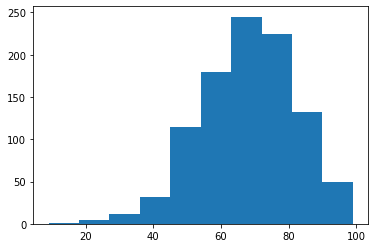

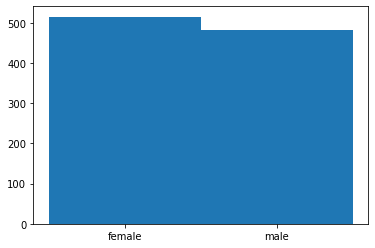

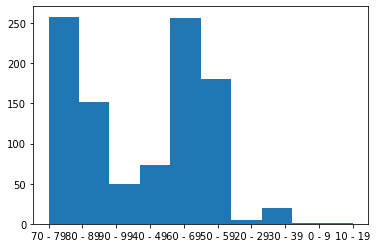

In [13]:
plt.hist(df['mean results'],bins=10)
plt.show()
plt.hist(df['gender'],bins=np.arange(3)-0.5)
plt.show()
plt.hist(df['group'])
plt.show()

In [14]:
print(df.groupby(['gender','group']).size())

gender  group  
female  0 - 9        1
        10 - 19      1
        20 - 29      2
        30 - 39     12
        40 - 49     22
        50 - 59     81
        60 - 69    129
        70 - 79    148
        80 - 89     82
        90 - 99     37
male    0 - 9        0
        10 - 19      0
        20 - 29      3
        30 - 39      8
        40 - 49     51
        50 - 59     99
        60 - 69    127
        70 - 79    110
        80 - 89     70
        90 - 99     13
dtype: int64


In [15]:
obj_df = df.select_dtypes(include=['object'])

obj_df['gender'] = obj_df['gender'].astype('category')
obj_df['race/ethnicity'] = obj_df['race/ethnicity'].astype('category')
obj_df['parental level of education'] = obj_df['parental level of education'].astype('category')
obj_df['lunch'] = obj_df['lunch'].astype('category')
obj_df['test preparation course'] = obj_df['test preparation course'].astype('category')

obj_df["gender_cat"] = obj_df["gender"].cat.codes
obj_df["race/ethnicity_cat"] = obj_df["race/ethnicity"].cat.codes
obj_df["parental level of education_cat"] = obj_df["parental level of education"].cat.codes
obj_df["lunch_cat"] = obj_df["lunch"].cat.codes
obj_df["test preparation course_cat"] = obj_df["test preparation course"].cat.codes

obj_df.head()

<ipython-input-15-2e772e95bd46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obj_df['gender'] = obj_df['gender'].astype('category')
<ipython-input-15-2e772e95bd46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obj_df['race/ethnicity'] = obj_df['race/ethnicity'].astype('category')
<ipython-input-15-2e772e95bd46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,gender,race/ethnicity,parental level of education,lunch,test preparation course,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat
0,female,group B,bachelor's degree,standard,none,0,1,1,1,1
1,female,group C,some college,standard,completed,0,2,4,1,0
2,female,group B,master's degree,standard,none,0,1,3,1,1
3,male,group A,associate's degree,free/reduced,none,1,0,0,0,1
4,male,group C,some college,standard,none,1,2,4,1,1


In [16]:
df_mean_cat = obj_df[['gender_cat','race/ethnicity_cat','parental level of education_cat','lunch_cat','test preparation course_cat']]
df_mean_cat.head()

,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat
0,0,1,1,1,1
1,0,2,4,1,0
2,0,1,3,1,1
3,1,0,0,0,1
4,1,2,4,1,1


In [17]:
df_mean_cat['mean results'] = df['mean results']
df_mean_cat.head()

<ipython-input-17-601c45909cf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mean_cat['mean results'] = df['mean results']


,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat,mean results
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


In [18]:
df_mean_cat.corr()

,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat,mean results
gender_cat,1.000000,0.001452,-0.000131,0.022824,-0.004512,-0.128842
race/ethnicity_cat,0.001452,1.000000,-0.026107,0.042116,-0.015746,0.173127
parental level of education_cat,-0.000131,-0.026107,1.000000,0.009176,-0.024633,-0.072203
lunch_cat,0.022824,0.042116,0.009176,1.000000,0.017989,0.286516
test preparation course_cat,-0.004512,-0.015746,-0.024633,0.017989,1.000000,-0.257766
mean results,-0.128842,0.173127,-0.072203,0.286516,-0.257766,1.000000


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
df['group'].replace({'0 - 9':1,'10 - 19':2 ,'20 - 29':3,'30 - 39':4,'40 - 49':5 ,'50 - 59':6,
                    '60 - 69':7,'70 - 79':8,'80 - 89':9 ,'90 - 99':10}, inplace=True)

In [21]:
df2 = df_mean_cat[['gender_cat','race/ethnicity_cat','parental level of education_cat','lunch_cat','test preparation course_cat']]

In [22]:
df2['group'] = df[['group']]

In [23]:
# X = df_mean_cat[['gender_cat','race/ethnicity_cat','parental level of education_cat','lunch_cat','test preparation course_cat']].values
X = df2[['gender_cat','race/ethnicity_cat','parental level of education_cat','lunch_cat','test preparation course_cat']].values
y = df2[['group']].values.astype(int)

In [24]:
df2.head()

,gender_cat,race/ethnicity_cat,parental level of education_cat,lunch_cat,test preparation course_cat,group
0,0,1,1,1,1,8
1,0,2,4,1,0,9
2,0,1,3,1,1,10
3,1,0,0,0,1,5
4,1,2,4,1,1,8


In [25]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True);

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class = 'multinomial').fit(X_train, y_train)

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [28]:
y_hat = clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
print("logisticRegression Accuracy: ", accuracy_score(y_test, y_hat))

logisticRegression Accuracy:  0.305


In [30]:
lr = LinearRegression()
lr = lr.fit(X_train,y_train)

y_hat = lr.predict(X_test)
print(y_hat)
print(y_test)
print(X_test)

[[7.37366537]
 [6.44082022]
 [7.48761157]
 [8.28421763]
 [7.9239889 ]
 [7.35527524]
 [7.93684367]
 [8.11389923]
 [7.12184748]
 [8.28421763]
 [7.4261348 ]
 [6.47880229]
 [8.13228936]
 [7.15982955]
 [6.32687403]
 [8.24623556]
 [7.52559363]
 [7.17821968]
 [7.25028105]
 [8.47292615]
 [7.71015308]
 [6.03707407]
 [7.37366537]
 [7.86761671]
 [7.76652528]
 [7.04588335]
 [7.82824835]
 [7.15982955]
 [7.38652013]
 [7.17821968]
 [7.58196583]
 [7.97482573]
 [7.04588335]
 [8.29707239]
 [7.59620688]
 [6.53517448]
 [7.9239889 ]
 [7.79026629]
 [7.5384484 ]
 [7.12184748]
 [6.20739246]
 [7.97482573]
 [7.71430216]
 [6.81919276]
 [7.80450734]
 [7.19781161]
 [7.02773953]
 [6.53517448]
 [7.38652013]
 [8.10716206]
 [7.71430216]
 [8.10716206]
 [8.28421763]
 [7.95643561]
 [6.81919276]
 [6.1694104 ]
 [6.49719242]
 [8.10716206]
 [6.98951115]
 [7.37366537]
 [7.4496295 ]
 [8.17027143]
 [7.78611721]
 [6.62537967]
 [8.0943073 ]
 [7.78611721]
 [7.63418895]
 [7.40774468]
 [6.34646596]
 [7.97482573]
 [6.70549288]
 [6.79

In [31]:
results = (y_test - y_hat).round()
print(results.mean())
xx = np.linspace(0,200,num=200)

0.17


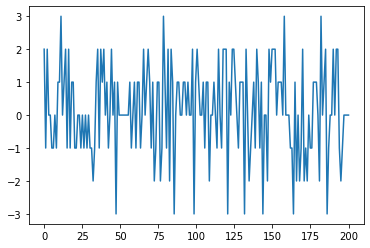

In [32]:
plt.plot(xx,results)

(array([ 8., 13.,  0., 39.,  0., 56., 49.,  0., 31.,  4.]),
 array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]),
 <a list of 10 Patch objects>)

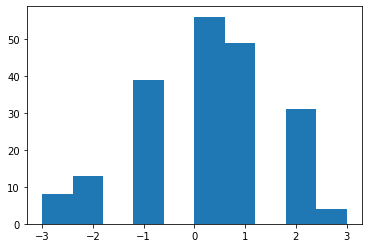

In [33]:
plt.hist(results)

In [34]:
SS_Residual = sum((y_test-y_hat)**2)       
SS_Total = sum((y_test-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

[0.23448754] [0.84612426]


In [ ]:
!pip3 uninstall seaborn
!pip3 install seaborn
import seaborn as sns